# 1. 실험 내용에 대한 전체 요약 
'adult' dataset을 이용하여 여러가지 특성(나이, 학력, 성별, 인종)이 연봉 50,000달러를 넘기는 것과 어떤 연관성이 있는지를 분석하는 실험했습니다. 크게 Logistic Regression, Decision Tree, MLPC, KNN, Bagging 으로 실험했으며, 모델마다 적절히 파라메터를 조정하거나 feature selection을 적용하여 각각의 기본 모델과 비교해 보았습니다. 그 결과 MLPC가 가장 유용하다는 결론을 내렸습니다.
 

#2. 선정한 데이터에 대한 설명 및 데이터 URL
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

위 데이터 셋은 14개의 Attribute로 이루어진 데이터로서, 13개의 feature과 하나의 label로 이루어져 있습니다. Instance의 개수는 48842입니다. 예측하고자 하는 것은 한 사람이 1년간 5만 달러 이상으로 수업을 얻는지 아닌지에 대한 것입니다. 

feature는 다음과 같습니다. 
1. 나이 : continuous 한 특성입니다.
2. 소속 : 무직을 포함해, 어떤 기관에서 일을 하는 지에 대한 특성입니다. 사기업, 공공기업, 국가기업 등으로 분류되어 있으며 미국을 기준으로 분류된 특성입니다. 
3. fnlwgt : continuous한 특성이며, 숫자의 크기가 대체로 정말 큰 편입니다.  어떤 특성인지 정확히 파악이 힘들 뿐더러, 데이터의 절댓값들이 크기 때문에 실험에 방해가 될 것 같아서 해당 feature는 제외하고 실험했습니다. 
4. education : 학력 수준을 나타내는 특성 입니다 .
5. education-num : 얼마나 오랜 기간동안 교육을 받았는지에 대한 특성 입니다. (continuous)
6. martial-status : 결혼 여부, 이혼 여부, 미혼 등 혼인 상태에 관한 특성 입니다.  
7. occupation : 2번 특성과 유사하지만, 조금 더 구체적인 직업 종류에 대한 특성입니다. 
8. relationship : 가정의 여부와 관련된 특성입니다. 
9. 인종 : 백인, 흑인, 아시안 등 인종과 관련된 특성입니다. 
10. sex : 생물학적 성별에 관한 특성입니다. 
11. capital-gain : 자본소득에 관한 특성입니다. (continuous)
12. capital-loss : 자본손실에 관한 특성입니다. (continuous)
13. hours-per-week : 주에 몇시간 일하는지에 대한 특성입니다. (continuous) 
14. native-country : 국적에 관한 특성입니다. 


#3. 실험 설계 및 진행 방법 

모델은 총 5개( LR, DT, KNN, MLPC, Bagging)을 선정했으며, 모두 Classification에적합한 모델입니다. 각각의 모델의 기본모델을 가지고 먼저 결과를 낸 다음, 필요한 경우 feature selection을 진행하거나, 모델의 파라메터를 조정하여 성능을 향상시키고자 했습니다. 자세한 내용은 아래 코드와 함께 작성했습니다. 


#3-1 : 데이터 전처리 
먼저 사용할 데이터를 전처리 했습니다. 과정은 다음과 같습니다.
1. 해당 데이터는 열의 이름이 존재하지 않았기 때문에 먼저 각각의 열마다 feature name을 먼저 추가했습니다. 
2. 사이킷런의 LabelEncoder을 통해 모든 특성을 정수형으로 바꿨습니다.
3. attribute를 feature과 label로 나눈 다음 'fnlwgt'열을 삭제했습니다. 
4. 데이터를 train set과 test set으로 분류했습니다.
5. 사이킷런의 StandardScaler를 이용하여 정규화 했습니다.  
 


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import sklearn

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df = pd.read_csv(url)


In [ ]:
# column 이름 바꾸기 
df.columns = ['age', 'workclass','fnlwgt','education','education_year','marry_status','occupation','relationship','race','sex','capital_gain','capital_loss','working_hours_per_week','native_country','earn']

In [ ]:
data = df.dropna()

In [ ]:
data.shape

(32560, 15)

In [ ]:
data.dtypes

age                        int64
workclass                 object
fnlwgt                     int64
education                 object
education_year             int64
marry_status              object
occupation                object
relationship              object
race                      object
sex                       object
capital_gain               int64
capital_loss               int64
working_hours_per_week     int64
native_country            object
earn                      object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder 

#모든 feature가 int 형태

le = LabelEncoder()
data.workclass = le.fit_transform(data.workclass)
data.education = le.fit_transform(data.education)
data.marry_status = le.fit_transform(data.marry_status)
data.occupation = le.fit_transform(data.occupation)
data.relationship = le.fit_transform(data.relationship)
data.race = le.fit_transform(data.race)
data.sex = le.fit_transform(data.sex)
data.native_country = le.fit_transform(data.native_country)
data.earn = le.fit_transform(data.earn)


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_year,marry_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,earn
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [ ]:
#데이터 전처리 - 'fnlwgt'열 삭제 /및 earn 을 label로 지정 
y = data[['earn']].to_numpy().ravel()
x = data.drop(columns=['fnlwgt'])
x = x.drop(columns = ['earn'])

In [ ]:
x

,age,workclass,education,education_year,marry_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country
0,50,6,9,13,2,4,0,4,1,0,0,13,39
1,38,4,11,9,0,6,1,4,1,0,0,40,39
2,53,4,1,7,2,6,0,2,1,0,0,40,39
3,28,4,9,13,2,10,5,2,0,0,0,40,5
4,37,4,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,11,9,4,1,3,4,1,0,0,20,39


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split #데이터 전처리 - 정규화 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_train, x_test = np.array(x_train), np.array(x_test)
y_train, y_test = np.array(y_train), np.array(y_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = np.clip(x_train, -5, 5)
x_test = np.clip(x_test, -5, 5)

In [ ]:
x_train

array([[-0.91990502,  0.08821939,  0.1800962 , ..., -0.21466946,
        -0.03606182,  0.29419146],
       [-1.13994541,  2.15400325,  1.21750131, ..., -0.21466946,
        -2.07172883,  0.29419146],
       [ 0.9137649 ,  0.08821939, -2.67276784, ..., -0.21466946,
         0.37107159,  0.29419146],
       ...,
       [-1.21329221,  0.08821939, -0.33860635, ..., -0.21466946,
        -0.03606182,  0.29419146],
       [-1.3599858 , -1.28896986,  0.1800962 , ..., -0.21466946,
        -0.03606182,  0.29419146],
       [-1.21329221,  0.08821939,  1.21750131, ..., -0.21466946,
        -0.03606182,  0.29419146]])

#3-2. 모델별 실험 진행 및 실험 결과 분석

#Model 1: Logistic Regression

먼저 기본 모델로 실험을 진행했습니다


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
scores = cross_val_score(model, x_train, y_train, cv=5) # cross validation
print(scores)
scores.mean()

[0.8168458  0.8229875  0.82492321 0.8293111  0.82097411]


0.823008344304661

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.46794834, -0.03367608,  0.07603496,  0.83597087, -0.3473153 ,
         0.05477044, -0.20504956,  0.06196838,  0.42371036,  2.3156296 ,
         0.28170012,  0.371498  ,  0.03787869]])

In [ ]:
model.score(x_test, y_test)

0.8273955773955773

cross_validation을 통해 parameter을 찾고, test set을 통해 결과를 보니 83% 정도의 정확도를 보입니다. 파라메터를 살짝 조정한 다른 모델을 생성해서 다시 실험을 진행했습니다. (규제 강도와, 계산에 사용할 작업 수를 높임)


In [ ]:

model2 = LogisticRegression(max_iter=10000000, C=100)


In [ ]:
scores2 = cross_val_score(model2, x_train, y_train, cv=5) # cross validation
print(scores2)
scores2.mean()

[0.8168458  0.8229875  0.82492321 0.8293111  0.82097411]


0.823008344304661

In [ ]:
model2.fit(x_train, y_train)

LogisticRegression(C=100, max_iter=10000000)

In [ ]:
model2.coef_

array([[ 0.46810905, -0.03374581,  0.07613706,  0.83662194, -0.3475663 ,
         0.05477095, -0.2050384 ,  0.06197711,  0.42417564,  2.33293719,
         0.28201418,  0.37169188,  0.03793441]])

In [ ]:
model2.score(x_test,y_test)

0.8274979524979525

LogisticRegression의 여러 파라메터를 다양하게 조절해보았지만, 데이터셋의 instance 개수가 엄청 큰 탓인지 유의미한 결과의 변화를 보진 못했습니다. 다음은 feature selection을 통해 특정 feature만 뽑아서 실험해 보았습니다.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

select.fit(x_train, y_train)
x_train_l1 = select.transform(x_train)
print("X_train.shape:", x_train.shape)
print("X_train_l1.shape:", x_train_l1.shape)

x_test_l1 = select.transform(x_test)
score = LogisticRegression(max_iter=10000).fit(x_train_l1, y_train).score(x_test_l1, y_test)
print("test score", score)

X_train.shape: (22792, 13)
X_train_l1.shape: (22792, 7)
test score 0.8213554463554463


사이킷런의 SelectFromModel을 통해서 유의미한 특성을 지녔다고 판단되는 것들을 뽑아 다시 model을 훈련시켰습니다. 그러나 역시 유의미한 변화를 보지는 못했고, 오히려 성능이 아주 미세하게 떨어지는 결과를 보였습니다. 

데이터셋의 크기가 아주 크고, 아주 다양한 feature을 지닌 만큼 82~83퍼센트 이상의 정확도를 구하는 것은 Logistic Model을 통해 구하기 힘들 것 같습니다.

#Model 2: Decision Tree


DecisionTree을 통해 모델을 훈련시키고자 할땐 아주 유용한 도구를 찾을 수 있었습니다.

사이킷런의 GridSearchCV를 통한 교차검증으로 일정 범위 내에서 최적의 파라메터를 찾았고, 이를 DT의 기본 모델과 비교해 보았습니다

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    'max_depth': range(5, 20,1),
    'min_samples_split': range(2,100,10)
}



In [ ]:
dt = DecisionTreeClassifier(max_depth= 5 )
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8497133497133497

In [ ]:
#교차검증을 통해 parameter 찾기 
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0002, 'min_samples_split': 62}


In [ ]:
dt2 = gs.best_estimator_
print(dt2.score(x_test, y_test))

0.8595413595413596


위와 같이 depth를 5로 설정한 DT 모델은 85퍼의 성능을 보인 반면, GridSearchCV를 통해 최적의 파라메터를 찾아 적용시킨 모델은 86퍼의 정확도를 보였습니다. 대체적으로 DT가 LR에 비해 높은 정확도를 보인 것을 알 수 있었으며, 앞으로 보일 모델들의 성능과 비교해도 준수한 수준이었습니다. 이는 DT가 지닌 자체적인 특성으로 인한 결과라 생각하며, 결론 부분에서 논의합니다.

In [ ]:
#feature selection을 추가한 DT 구현 

from sklearn.feature_selection import SelectPercentile, f_classif
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(x_train, y_train)
x_train_selected = select.transform(x_train)
x_test_selected = select.transform(x_test)

gs2 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs2.fit(x_train_selected, y_train)
print(gs2.best_params_)

dt3 = gs2.best_estimator_
print(dt3.score(x_test_selected, y_test))

{'max_depth': 10, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}
0.8463349713349714


혹시나 싶어 feature selection을 통해 특성의 개수를 줄여 같은 데이터를 훈련시켜 봤지만, 오히려 더 성능이 하락된 결과를 보였습니다. 





#Model 3 : MPLClassifier


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

In [ ]:
perceptron_mlpc = MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.01)

In [ ]:
scores = cross_val_score(perceptron_mlpc, x_train, y_train, cv=5) # cross validation
print(scores)
scores.mean()

[0.84053521 0.84360605 0.84620448 0.83874506 0.84225538]


0.8422692346968386

In [ ]:
perceptron_mlpc.fit(x_test, y_test)

MLPClassifier(learning_rate_init=0.01, max_iter=1000, random_state=42)

In [ ]:
perceptron_mlpc.score(x_test, y_test)

0.8910728910728911

먼저 기본 모델로 실험했을 때 89퍼라는 높은 정확도를 보여주었습니다. MLPC의 기본 Activation은 'Relu'인데, 이를 logistic으로 바꾸어 진행해 보았습니다.

In [ ]:
perceptron_mlpc2 = MLPClassifier(hidden_layer_sizes=(1000,), activation='logistic', max_iter=1000)

In [ ]:
scores = cross_val_score(perceptron_mlpc2, x_train, y_train, cv=5) # cross validation
print(scores)
scores.mean()

[0.8471156  0.82057469 0.84971479 0.85388328 0.81724441]


0.8377065515452851

In [ ]:
perceptron_mlpc2.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(1000,), max_iter=1000)

In [ ]:
perceptron_mlpc2.score(x_test, y_test)

0.8484848484848485

Activation을 Logistic으로 바꾸어 진행했을 땐 성능이 확 낮아진 것을 확인할 수 있습니다. 분류하고자 하는 데이터가 정규화 되어있기 때문에 오히려 단순한 Relu가 더 적합할 것이라는 결론을 내렸습니다.
다음으로는 learning rate를 조절해 모델을 새로 학습시켰습니다.


In [ ]:
perceptron_mlpc3 = MLPClassifier(hidden_layer_sizes=(1000,), activation='relu', max_iter=1000, learning_rate_init= 0.001)

In [ ]:
scores3 = cross_val_score(perceptron_mlpc3, x_train, y_train, cv=5) # cross validation
print(scores3)
scores3.mean()

[0.84294801 0.83549024 0.84379114 0.83677051 0.83194384]


0.8381887477729706

In [ ]:
perceptron_mlpc3.fit(x_train, y_train)
perceptron_mlpc3.score(x_test, y_test)

0.8441850941850941

Data의 개수가 큰 편인 만큼  learning rate를 더 줄이는게 오히려 좋지 않은 결과를 낳았습니다. 그러나 두 번째와 세 번째 모델 모두 train set에서 보다 test set에서 좋은 결과를 보인 만큼 MPLC의 성능 자체가 강력하다는 것을 확인할 수 있었습니다.


#Model 4 : K-Nearest Neighbor Classifier
분류에 사용한 네 번째 모델은 바로 KNN 입니다. 인간은 인종, 학력, 나이가 가까이 있을수록 사회적 지위와 연봉도 엇비슷할 것이라는 가설에 착안하여 비교적 간단한 모델인 KNN을 선정해 사용해 보았습니다.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8228910728910729

In [ ]:
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
score = []
for k in n_neighbors_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  score.append(knn.score(x_test, y_test))

In [ ]:
n_neighbors_list[np.argmax(score)]

19

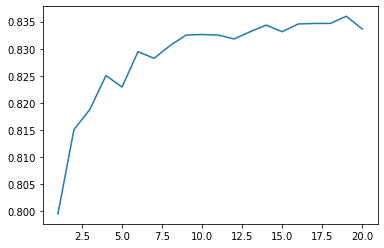

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_neighbors_list, score)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8325143325143325

먼저 기본 모델입니다. Neighbor의 수를 1부터 10까지 늘려가며 test했을 땐 이웃의 수가 9일때 가장 좋은 성능을 보였고, 완만한 상승 곡선을 보였습니다. 다만 그래프가 전체적으로 왼쪽 위와 가까운 곡선의 형태를 띄고 있기 때문에 이웃의 수가 더 증가한다고 해서 유의미한 성능 향상이 있진 않을 것이라 생각합니다. 

In [ ]:
for k in n_neighbors_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_selected, y_train)
  score.append(knn.score(x_test_selected, y_test))
  

In [ ]:
n_neighbors_list[np.argmax(score)]

9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_selected, y_train)
knn.score(x_test_selected, y_test)

0.7347461097461098

Feature selection을 통해 특성의 개수를 줄인 결과 모델의 성능이 눈에 띄게 떨어졌습니다. 위 데이터셋에선 어느 모델에서나 feature selection이 대체적으로 안좋은 결과를 가져온다는 것을 알 수 있었습니다.

#Model 5 : Ensemble Methods : Bagging 

먼저 Bagging에선 2(feature selection 여부) * 3(사용된 모델[LR, MLPC, DT]) = 6
가지의 다른 방법으로 실험해 보았습니다



In [ ]:
# feature selection 

from sklearn.feature_selection import SelectPercentile, f_classif
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(x_train, y_train)


SelectPercentile(percentile=50)

In [ ]:
x_train_selected = select.transform(x_train)

In [ ]:
print("x_train.shape", x_train.shape)
print("X_train_selected.shape", x_train_selected.shape)

x_train.shape (22792, 13)
X_train_selected.shape (22792, 6)


In [ ]:

# 테스트 데이터 변환
x_test_selected = select.transform(x_test)

위 과정은 미리 feature selection을 진행한 과정입니다.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
bagging.score(x_test, y_test)

0.8230958230958231

In [ ]:
bagging.fit(x_train_selected, y_train)
bagging.score(x_test_selected, y_test)

0.8222768222768223

먼저 LogisticRegression을 베이스로 한 모델에서는 feature selection을 진행했을 때나 진행하지 않았을 때나 거의 유사한 성능을 보였습니다. (오히려 feature selection을 사용했을 때 성능이 떨어졌습니다.

In [ ]:
bagging2 = BaggingClassifier(MLPClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging2.fit(x_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(), n_estimators=100, n_jobs=-1,
                  oob_score=True, random_state=42)

In [ ]:
bagging2.score(x_test, y_test)

0.8515561015561015

In [ ]:
bagging2.fit(x_train_selected, y_train)
bagging2.score(x_test_selected, y_test)

0.8478705978705978

다음으로는 MLPC를 이용한 Bagging을 진행했습니다. 역시나 feature selection을 진행하지 않았을 때 더 좋은 성능을 보였습니다.

In [ ]:
bagging3 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42) 
bagging3.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
bagging3.score(x_test, y_test)

0.8414209664209664

In [ ]:
bagging3.fit(x_train_selected, y_train)
bagging3.score(x_test_selected, y_test)

0.8279074529074529

마지막으로 DT를 이용한 Bagging입니다. 이 또한 feature selection을 진행하지 않았을 때 더 좋은 성능을 보였습니다. 

세 종류의 앙상블 중에선 MLPC를 이용한 앙상블 기법이 가장 뛰어난 성능을 보였습니다. 애초에 성능이 높았던 MLPC를 사용한 것이 그대로 결과에 반영되었다 생각합니다.

#5 결론

다섯가지 모델에서 몇가지 유사한 결과를 얻을 수 있었습니다. 
1. feature selection이 오히려 모델들의 성능을 하락시킨다. 
- adult dataset의 경우 feature selection이 오히려 모델의 성능을 하락시키는 결과를 보였습니다. select할 특성의 비율을 여러가지로 조정해봐도, 결국 모델의 성능은 하락했습니다. 이것은 아마 모든 feature 들이 상호보완적으로 모델의 성능을 뒷받침한다고 설명할 수 있을 것입니다. data의 feature들을 보면, 하나같이 한 인간이 삶을 영위하는데 있어 중요한 요소들 뿐 입니다. feature selection을 통해 성능이 하락하는 것이 이를 뒷받침 한다고 결론을 내렸습니다. 

2. Decision tree는 feature의 수가 많고, instance 수가 클 경우 무조건 depth를 줄이고 가지치기를 하는 것이 능사는 아니다. 
- GCV를 통해 최적의 파라메터를 찾은 결과, 최적의 depth는 14 였고, min_sample_split은 62라는 값이었습니다. 데이터셋의 크기 치고는 꽤 깊은 값이라고 생각했는데, DT를 이용한 모델 중 가장 뛰어난 성능을 보였습니다. 

3. 단순한 분류 모델보다는 DL의 시초격인 MLPC가 뛰어난 성능을 보인다. 
- 다른 모델이 80퍼 초중반을 웃도는 정확도를 보인 반면, MLPC는 파라메터를 조정했을 때 거의 90퍼에 가까운 결과를 얻어냈습니다. 데이터셋의 특성상 아주 다양한 요소가 label을 결정짓게 됩니다. 이들이 적절히 얽혀 hidden layer으로 보내지는데, 이때 Relu의 역할이 결정적으로 작용한 것 같습니다. MLPC를 하기 전 이미 데이터를 정규화 하는 작업을 했기 때문에, Relu가 0 미만의 값을 잘랐을 때 더욱 확실한 결과를 보장하는 것이라 결론 내렸습니다. 

4. KNN의 Neighbor 숫자가 높을수록 모델의 성능이 높아졌다. 
- 이번 실험을 진행하면서 가장 흥미롭게 보았던 내용입니다. k의 값을 1부터 20까지 조절해 보았을 때, 정확도가 점점 상승하다가 0.835정도의 값으로  수렴하는 것을 확인할 수 있었습니다. 인간의 삶에 대한 데이터인 만큼, '유유상종' 이라는 말이 잘 적용된 예시 같습니다. 이웃의 값을 높이면 성능이 낮아지는 모델도 있는 반면, Adult dataset에서는 적당히 수를 크게 가져가는 것이 유리하다는 결론을 내렸습니다. 

5. Bagging은 왜 성능의 유의미한 향상을 이끌어 내지 못했는가, (최종 결론) 
- 먼저 아무리 되짚어봐도 Bagging방법 자체의 문제는 아닐 것이라 판단했습니다. 비슷한 맥락으로 feature selection 방법 자체에 문제가 없다고 생각했습니다. 그렇다면 왜 성능은 최대 90퍼를 넘지 못하는 것일까요? 이는 Dataset에 특성에 기반한 것이라는 결론을 내렸습니다. 주변에 연봉이 5만 달러가 넘는 사람들을 관찰해보면 '대체적으로' 좋은 교육을 받았고, 가정 환경이 화목하며, 좋은 직업을 가진 사람들일 것입니다. 그러나 똑같은 조건에서도 '모두가' 5만 달러 이상의 연봉을 받진 못할 것입니다. 인간의 삶은 저 13개의 feature만으로는 정의할 수 없는 엄청나게 다양한 변수가 있기 때문입니다. 기본 모델들이 80퍼의 언저리의 성능을 냈다는 것은, 이미 주워진 data 안에서 사람의 인생의 특성을 아주 잘 반영한 결과라고 생각합니다. 위 특성들이 조금 더 우월한 값을 가지면 80퍼의 확률로 높은 연봉을 받아가며 살 수 있는 것이죠. 그러나 그 반대의 경우도 필연적으로 존재할 수 밖에 없는 것이고, 이는 기본적인 모델의 feature selection이나 Bagging 기법을 적용하는 단순한 방법으로는 설명할 수 없는 아주 복잡한 이유가 있기 때문일 것입니다. 때문에 거의 모든 결과가 80~90퍼를 웃돌았다는 결론을 내릴 수 있었습니다.
